# 1. Load & Visualize the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


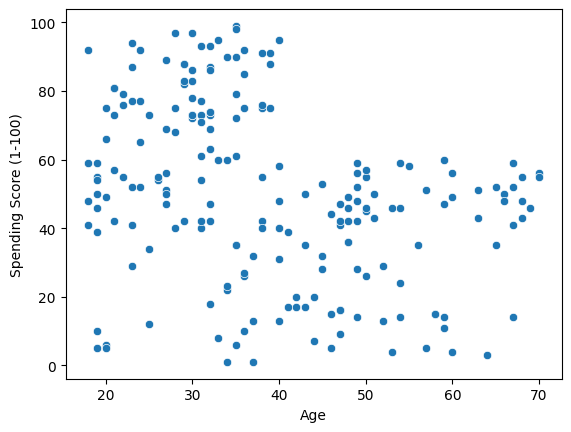

In [6]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.show()

# 2. Preprocess & Reduce Dimensions

In [7]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply K-Means Clustering

In [9]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels
df['Cluster'] = kmeans.labels_
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


# 4. Find Optimal K (Elbow Method)

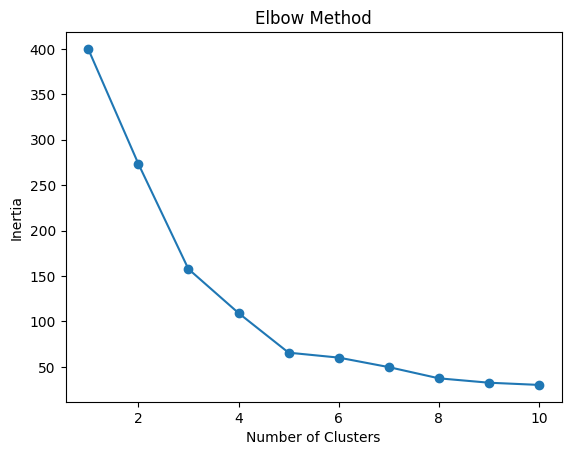

In [10]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot elbow curve
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 5. Evaluate Clustering with Silhouette Score

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


# 6. Visualize Clusters

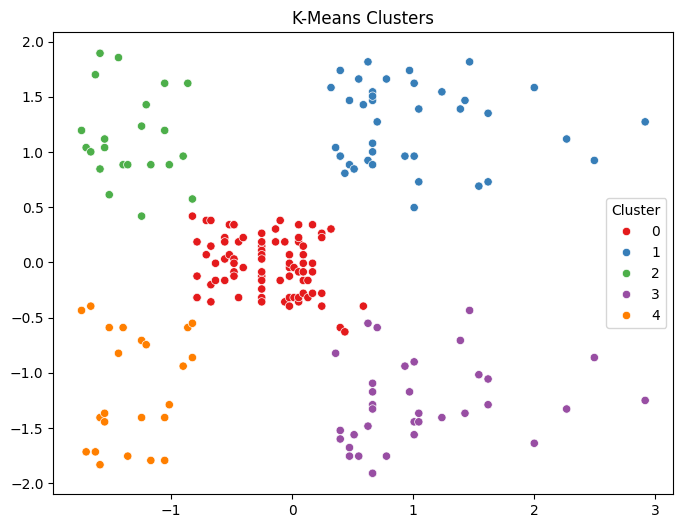

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("K-Means Clusters")
plt.show()